In [51]:
import numpy as np
import math
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [52]:
#code function
def gamma_dist(_k,_sigma, x):
    first = (math.gamma(_k))*(_sigma**_k)
    second = (x**(_k-1))*np.exp(-(x/_sigma))
    ans = second/first
    return(ans)

In [53]:
#find the maximum y value on the X interval 0 to 10
X=np.linspace(0,10,1000)
y2=max((gamma_dist(10,0.5,X)))+0.000001
#generate x and y values on our grid
x_val = np.random.uniform(0,10,10000000)
y_val = np.random.uniform(0,y2,10000000)

In [54]:
#throw darts at out area of interest and calculate what proportion are below the curve
count = []
for i in range(len(y_val)):
    if y_val[i] < gamma_dist(10,0.5,x_val[i]):
        count.append(1)
    else:
        count.append(0)
#multiply our are by the proportion of darts below the curve to find our integral
integral = (np.mean(count))*10*y2

In [55]:
#code our Monte Carlo Integration function
def mc_integrate(func, upper, lower, n):
    #find the maximum y value on the X interval 0 to 10
    X=np.linspace(lower,upper,1000)
    y2=max((func(10,0.5,X)))+0.000001
    #generate x and y values on our grid
    x_val = np.random.uniform(lower,upper,n)
    y_val = np.random.uniform(0,y2,n)
    #throw darts at out area of interest and calculate what proportion are below the curve
    count = []
    for i in range(len(y_val)):
        if y_val[i] < func(10,0.5,x_val[i]):
            count.append(1)
        else:
            count.append(0)
    #multiply our are by the proportion of darts below the curve to find our integral
    integral = (np.mean(count))*(10)*y2
    return(integral)

In [56]:
#calculate real value of the integral
val = gamma.cdf(10, 10, loc=0, scale=0.5)
print("The true value of the integral is", val)

The true value of the integral is 0.995004587692


The monte carlo estimation of the integral with  100 samples is 0.89593771497
The error in the monte carlo integration with a sample of 100 is 0.0990668727221
The monte carlo estimation of the integral with  1000 samples is 0.927559046086
The error in the monte carlo integration with a sample of 1000 is 0.0674455416055
The monte carlo estimation of the integral with  10000 samples is 0.989484152856
The error in the monte carlo integration with a sample of 10000 is 0.00552043483558
The monte carlo estimation of the integral with  100000 samples is 0.99077535721
The error in the monte carlo integration with a sample of 100000 is 0.00422923048165
The monte carlo estimation of the integral with  1000000 samples is 0.995133830682
The error in the monte carlo integration with a sample of 1000000 is -0.00012924299058
The monte carlo estimation of the integral with  10000000 samples is 0.994821833549
The error in the monte carlo integration with a sample of 10000000 is 0.000182754143104


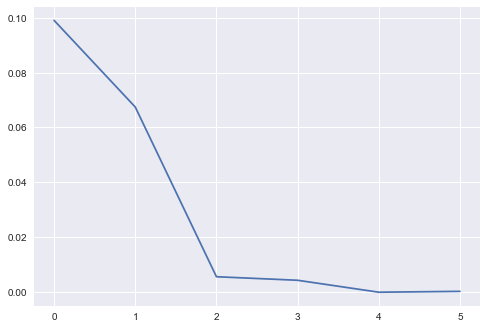

In [62]:
samples = [100,1000,10000,100000,1000000,10000000]    
error = []
for i in range(len(samples)):    
    integral = mc_integrate(gamma_dist, 10, 0, samples[i])
    err = val-integral
    error.append(err)
    print("The monte carlo estimation of the integral with ",samples[i], "samples is", integral)
    print("The error in the monte carlo integration with a sample of",samples[i], "is", err)

sns.set_style("darkgrid")
plt.plot(error)
plt.show()